데이터 전처리

데이터 수집 20% + 데이터 전처리 60% 시간 사용 (백조 발 구르기)
특성 생성 (데이터 프레임)
특성 삭제 (데이터 프레임)
변수 나누기 (독립 변수와 종속 변수 나누기)
수(치)가 아닌 데이터를 수(치)로 변환
결측값 처리
정규 분포로 변환
이상값 처리
원핫 인코딩
구간화
라벨 인코딩
특성 스케일링
차원 축소
커스텀 데이터 변환
군집화


모델 생성


모델 학습

회귀 
분류


모델 검증

선형 회귀 모델 (선형: 수식이 직선)   
    선형 회귀 (LinearRegression) 모델
    라쏘 (Lasso) 모델
    릿지 (Ridge) 모델
비선형 회귀 모델 (비선형: 수식이 곡선)
    k-최근접 이웃 (KNeighborsRegressor) 모델
    의사 결정 나무 (DecisionTreeRegressor) 모델
    서포트 벡터 머신 (SVR) 모델

실제 모델 구축에 들어가기 전에 아래와 같은 사항에 대해 확인하고 진행하는 것을 권장한다.

범주형, 연속형 데이터 형식의 적절성
이상치 및 결측치 처리 여부
스케일링 및 분포 변환
다중공선성 문제
예측변수(y)의 분포 imbalance 문제
변수 축소 및 파생 변수 생성

데이터가 학습 데이터와 테스트 데이터로 나누어 진 경우는 반드시 fit() 함수와 transform() 함수를 따로 사용

transformer = SimpleImputer()
transformer.fit(x_data)
x_data = transformer.transform(x_data)
print(x_data)

transformer.fit(x_train) #SimpleImputer 모델에 x_train 데이터 적용 (평균값 계산)
x_train = transformer.transform(x_train) 
x_test = transformer.transform(x_test)

## 정시 배송 여부 판단 (2회기출)

데이터 설명 : e-commerce 배송의 정시 도착여부 (1: 정시배송 0 : 정시미배송)

데이터 출처 :https://www.kaggle.com/datasets/prachi13/customer-analytics (참고, 데이터 수정)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [30]:
x_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_test.csv')

In [4]:
x_train.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6045,A,Flight,4,3,266,5,high,F,5,1590
1,44,F,Ship,3,1,174,2,low,M,44,1556


In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6598 non-null   int64 
 1   Warehouse_block      6598 non-null   object
 2   Mode_of_Shipment     6598 non-null   object
 3   Customer_care_calls  6598 non-null   object
 4   Customer_rating      6598 non-null   int64 
 5   Cost_of_the_Product  6598 non-null   int64 
 6   Prior_purchases      6598 non-null   int64 
 7   Product_importance   6598 non-null   object
 8   Gender               6598 non-null   object
 9   Discount_offered     6598 non-null   int64 
 10  Weight_in_gms        6598 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 567.1+ KB


In [6]:
x_train.describe()

,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,5476.977266,2.991361,210.393149,3.577751,13.353592,3604.191119
std,3172.946154,1.409624,48.258089,1.511394,16.187267,1635.697627
min,1.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2731.250000,2.000000,170.000000,3.000000,4.000000,1834.250000
50%,5476.000000,3.000000,214.000000,3.000000,7.000000,4119.500000
75%,8187.750000,4.000000,251.000000,4.000000,10.000000,5027.500000
max,10998.000000,5.000000,310.000000,10.000000,65.000000,7684.000000


In [16]:
x_train.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls    object
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
dtype: object

In [8]:
x_train.nunique()

ID                     6598
Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          3365
dtype: int64

In [22]:
x_train.select_dtypes('object').head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Gender
0,A,Flight,4,high,F
1,F,Ship,3,low,M
2,F,Road,4,high,M
3,F,Ship,4,medium,F
4,A,Flight,5,low,M
5,C,Ship,3,high,M
6,F,Ship,3,low,F
7,F,Ship,3,low,F
8,C,Ship,5,medium,F
9,A,Road,5,low,F


In [27]:
x_train.select_dtypes('object').nunique()

Warehouse_block        5
Mode_of_Shipment       3
Customer_care_calls    6
Product_importance     3
Gender                 2
dtype: int64

In [23]:
x_train.select_dtypes(exclude = 'object').head(10)

,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,6045,3,266,5,5,1590
1,44,1,174,2,44,1556
2,7940,1,154,10,10,5674
3,1596,3,158,3,27,1207
4,4395,3,175,3,7,4833
5,1991,3,139,4,17,1137
6,7896,1,220,2,7,5653
7,4338,2,160,3,4,4683
8,3215,2,145,4,9,4028
9,10251,2,155,3,10,4485


In [26]:
x_train.select_dtypes(np.number).head(10)

,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,6045,3,266,5,5,1590
1,44,1,174,2,44,1556
2,7940,1,154,10,10,5674
3,1596,3,158,3,27,1207
4,4395,3,175,3,7,4833
5,1991,3,139,4,17,1137
6,7896,1,220,2,7,5653
7,4338,2,160,3,4,4683
8,3215,2,145,4,9,4028
9,10251,2,155,3,10,4485


In [24]:
x_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [29]:
x_train_id = x_train.pop('ID')
x_train_id.head(3)

0    6045
1      44
2    7940
Name: ID, dtype: int64

In [39]:
import sklearn
print(sklearn.__all__)

['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']


In [38]:
import sklearn.model_selection
print(dir(sklearn.model_selection))

['BaseCrossValidator', 'BaseShuffleSplit', 'GridSearchCV', 'GroupKFold', 'GroupShuffleSplit', 'KFold', 'LearningCurveDisplay', 'LeaveOneGroupOut', 'LeaveOneOut', 'LeavePGroupsOut', 'LeavePOut', 'ParameterGrid', 'ParameterSampler', 'PredefinedSplit', 'RandomizedSearchCV', 'RepeatedKFold', 'RepeatedStratifiedKFold', 'ShuffleSplit', 'StratifiedGroupKFold', 'StratifiedKFold', 'StratifiedShuffleSplit', 'TimeSeriesSplit', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_plot', '_search', '_split', '_validation', 'check_cv', 'cross_val_predict', 'cross_val_score', 'cross_validate', 'learning_curve', 'permutation_test_score', 'train_test_split', 'typing', 'validation_curve']


In [37]:
import sklearn.metrics
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [41]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [44]:
x_train_dummies = pd.get_dummies(x_train)
x_test_dummies = pd.get_dummies(x_test)
x_test_dummies = x_test_dummies[x_train_dummies.columns]
y_train = y_train['Reached.on.Time_Y.N']

In [48]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train_dummies, y_train, test_size = 0.3, random_state = 42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_tr, y_tr)

RandomForestClassifier(random_state=42)

## 모델 예측값 출력: predict

(회귀) 구체적인 특정값 출력 (0.98733,...)

(분류) 가장 확률이 높은 클래스를 출력 (0,1,2,...)

분류 모델이 각 클래스에 대한 확률을 출력하는 것이 predict_proba   # predict probability 각 클래스의 확률을 예측하라 >> 회귀에서는 필요 없음


prdict_proba[:,1]은 이진분류 문제일 때, 회귀문제를 분류모델을 통해 푸는 방식임

다중분류 문제: 0,1,2 중 하나를 출력, predict_proba로 출력한 이후 일정값 이하를 필터링, np.argmax를 통해 각 row별 최대값의 index를 구한 후 해당값이 기준값 이상인지 확인

scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수: decision_funcion, predict_proba

이진분류:

    predict_proba(n_samples, 2)
    - 두 클래스의 확률합은 1. 둘 중 하나는 50% 이상의 확신을 가짐
    - 첫번째 열은 0이 될 확률, 두번째 열은 1이될 확률


다중분류:

    - predict_proba와 decision_function의 결괏값 크기는 항상 (n_samples, n_classes)

In [61]:
from sklearn.metrics import accuracy_score , f1_score, recall_score, roc_auc_score, precision_score

#model_score
pred_train_label = rf.predict(x_tr)
pred_train_proba = rf.predict_proba(x_tr)[:,1]

pred_val_label = rf.predict(x_val)
pred_val_proba = rf.predict_proba(x_val)[:,1]

In [50]:
rf.predict(x_tr)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [51]:
rf.predict_proba(x_tr)

array([[0.88, 0.12],
       [0.16, 0.84],
       [0.23, 0.77],
       ...,
       [0.  , 1.  ],
       [0.84, 0.16],
       [0.78, 0.22]])

In [53]:
rf.predict_proba(x_tr)[:,1]

array([0.12, 0.84, 0.77, ..., 1.  , 0.16, 0.22])

## 모델성능 평가

모델 평가 목적: 최적모델 찾기

training과 validation값이 거의 일치해야 좋은 모델임

    모델링 목적   목표변수 유형  관련모델                         평가방법
    예측/회귀     연속형         선형회귀                         MSE, RMSE, MAE, MAPE  (오차, 작을수록 좋음)
    분류          범주형         로지스틱회귀, SVM, 의사결정나무  정확도, 정밀도, 재현율, F1-score 
    
    Confusion matrix            예측값 
                                 Predicted Positive   Predicted Negative
        실제값 Actual Positive   TP                   FN
               Actual Negative   FP                   TN
              
- 정확도 Accuracy : 전체 데이터 중 정확히 예측한 데이터의 수

- 정밀도 Precision : TP / (TP + FP)   양성판단된 것 중, 진짜 양성 비율   /   실제 negative데이터를 positive로 잘못 판단했을 때 더 문제가 되는 경우 중요

- 재현율 Recall = 민감도 Sensitivity : TP / (TP + FN)    진짜 양성 중, 양성판단된 비율   /   실제 positive데이터를 negative로 잘못 판단했을 때 더 문제가 되는 경우 중요

- F1 Score : 2 * Precision * Recall / (Precision + Recall) 재현율과 정밀도의 조화평균   /    정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 가질 때 F1 Score는 높은 값, 1에 가까울 수록 좋음

- AUC Area Under the Curve

- ROC Receiver Operating Characteristic : 
 -- TPR(참양성률, 민감도)가 y축  TP / (TP + FN)
 -- FPR(거짓양성률, 1-특이도)가 x축   FP / (FP + TN)

In [55]:
# 정확도: 전체 데이터 중 정확히 예측한 데이터의 수
accuracy_score(y_tr, pred_train_label), accuracy_score(y_val, pred_val_label)


(1.0, 0.6606060606060606)

In [56]:
# 재현율: 참 중 양성판단 비율
recall_score(y_tr, pred_train_label), recall_score(y_val, pred_val_label)

(1.0, 0.5996592844974447)

In [57]:
# 정밀도: 양성판단 중 참 비율
precision_score(y_tr, pred_train_label), precision_score(y_val, pred_val_label)

(1.0, 0.7770419426048565)

In [58]:
# f1_score: 높을수록
f1_score(y_tr, pred_train_label), f1_score(y_val, pred_val_label)


(1.0, 0.676923076923077)

In [62]:
# ROC AUC score
roc_auc_score(y_tr, pred_train_proba), roc_auc_score(y_val, pred_val_proba)

(1.0, 0.7315935424689615)

In [63]:
# test데이터 마찬가지 위와 같은 방식
pred_test_label = rf.predict(x_test_dummies)
pred_test_proba = rf.predict_proba(x_test_dummies)[:,1]


In [65]:
pred_test_label, pred_test_proba

(array([1, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0.54, 0.4 , 0.35, ..., 0.51, 0.38, 0.99]))

In [ ]:
# accuracy, f1_score, recall, precision 
#pd.DataFrame({'ID': x_test.ID, 'Reached.on.Time_Y.N': predict_test_label}).to_csv('003000000.csv', index=False)

# auc, 확률
#pd.DataFrame({'ID': x_test.ID, 'Reached.on.Time_Y.N': predict_test_proba}).to_csv('003000000.csv', index=False)

## Used Car Price dataset 중고차 가격 예측(회귀)

In [78]:
x_train = pd.read_csv('data_csv/X_train.csv')
x_test = pd.read_csv('data_csv/X_test.csv')
y_train = pd.read_csv('data_csv/y_train.csv')
y_test = pd.read_csv('data_csv/y_test.csv')

In [79]:
x_train.head(3)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9


In [81]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4960 non-null   int64  
 6   fuelType      4960 non-null   object 
 7   tax           4960 non-null   float64
 8   mpg           4960 non-null   float64
 9   engineSize    4960 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 387.6+ KB


In [80]:
x_train.dtypes

carID             int64
brand            object
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [82]:
x_train.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [83]:
x_train_id = x_train.pop('carID')
x_test_id = x_test.pop('carID')

In [84]:
# 수치형 컬럼 표준화

x_train.select_dtypes(exclude = 'object').columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [85]:
cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train[cols] = ss.fit_transform(x_train[cols])
x_test[cols] = ss.fit_transform(x_test[cols])


In [86]:
x_train.head(3)

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,hyundi,Santa Fe,0.784430,Semi-Auto,-0.848304,Diesel,-0.088993,-0.295744,0.095814
1,vauxhall,GTC,-0.602655,Manual,0.937516,Diesel,-0.331725,0.272200,-0.157579
2,audi,RS4,0.784430,Automatic,-0.810335,Petrol,-0.088993,-0.595105,0.982689


In [87]:
# 범주형 컬럼 라벨인코딩

x_train.select_dtypes(include = 'object').columns

Index(['brand', 'model', 'transmission', 'fuelType'], dtype='object')

In [88]:
colnames = ['brand', 'model', 'transmission', 'fuelType']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in colnames:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.fit_transform(x_test[col])


In [89]:
x_train.head(3)

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,3,69,0.784430,3,-0.848304,0,-0.088993,-0.295744,0.095814
1,7,30,-0.602655,1,0.937516,0,-0.331725,0.272200,-0.157579
2,0,58,0.784430,0,-0.810335,4,-0.088993,-0.595105,0.982689


array([[<Axes: title={'center': 'price'}>]], dtype=object)

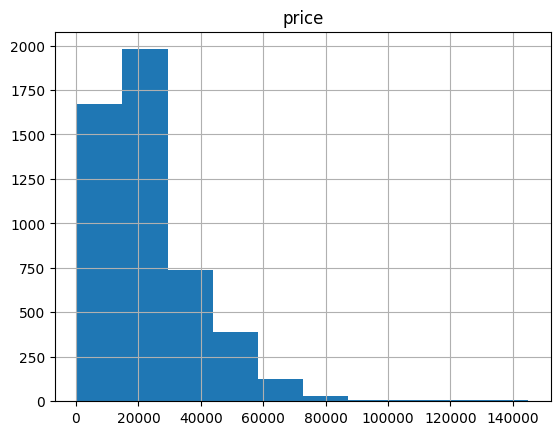

In [98]:
# y_train 확인
y_train = y_train.drop('carID', axis = 1)
y_train.hist()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

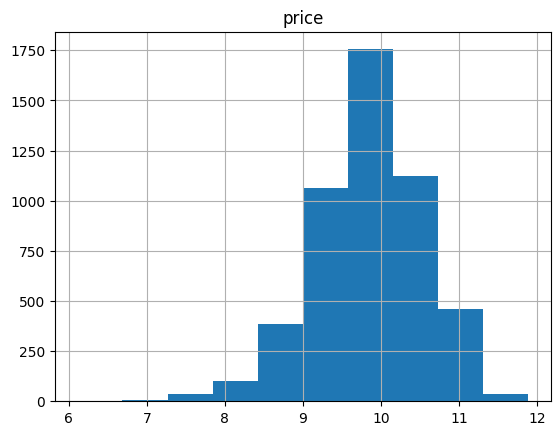

In [106]:
# y_train 로그씌우기: 정규분포에 가깝게 만들기 위해
y_train = np.log1p(y_train)
y_train.hist()

In [107]:
# train / test set 구분

from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 52)

In [109]:
# 회귀모델 만들기

from sklearn.metrics import mean_squared_error, r2_score

# 1) XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_tr, y_tr)
pred_xgb = xgb.predict(x_val)
print('XGB 결정계수:', r2_score(pred_xgb, y_val))
print('XGB RMSE:', round(np.sqrt(mean_squared_error(pred_xgb, y_val)),3))

XGB 결정계수: 0.9616768630413666
XGB RMSE: 0.135


In [110]:
# 2) Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_tr, y_tr)
pred_rf = rf.predict(x_val)
print('RF 결정계수:', r2_score(pred_rf, y_val))
print('RF RMSE:', round(np.sqrt(mean_squared_error(pred_rf, y_val)),3))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15024\1427516105.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_tr, y_tr)


RF 결정계수: 0.9490338901651496
RF RMSE: 0.152


In [113]:
# 최종모델: XGBOOST 채택
pred_final = xgb.predict(x_test)

y_test['price'] = np.log1p(y_test['price'])

df = pd.DataFrame({'id': x_test_id, 'price': pred_final})
df.head(3)

,id,price
0,12000,10.502266
1,12001,10.024216
2,12004,10.990602


In [115]:
print('최종모델 결정계수:', round(r2_score(y_test['price'], df['price']), 3))
print('최종모델 RMSE:', round(np.sqrt(mean_squared_error(y_test['price'], df['price'])),3))

최종모델 결정계수: 0.948
최종모델 RMSE: 0.158


In [ ]:
# 저장
df.to_csv('1234.csv', index = False)